Nesse módulo, iremos trabalhar com a base de dados do DataSUS.

Em primeiro momento, utilizaremos uma base de dados com o número de [diagnósticos mensais de tuberculose por ano no Brasil](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/tubercbr.def).

**Fonte**: Ministério da Saúde/SVS - Sistema de Informação de Agravos de Notificação - Sinan Net <br>
Dados de 2001 a 2015 estão finalizados; <br>
dados de 2016 a 2019 atualizados em 11/2020, sujeitos à revisão; <br>
dados disponibilizados no TABNET em 12/2020, após homologação da Coordenação Geral de Vigilância das Doenças de Transmissão Respiratória de Condições Crônicas /DCCI/SVS.

#### O que é uma série temporal?

Em estatística, econometria, matemática aplicada e processamento de sinais, uma série temporal é uma coleção de observações feitas sequencialmente ao longo do tempo. Podemos utilizar esses dados para fazer inferência de valores.


#### Artigos recomendados por colegas do bootcamp no discord:
https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621

## Aula 01 - Série Temporal


### Video 01: Preparando o ambiente

In [1]:
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv"
df = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=16, engine="python")

df.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [3]:
df.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005
19,Total,142969,129386,149875,143199,143264,133444,141800,149952,140241,144870,136864,128893,1684757


#### Desafio 01: transformar os dados em uma série temporal Ano-Mês

In [4]:
# Utilizando o melt no df sem o elemento/observação "total" pra transformar as colunas em váriaveis
serie_ano_mes = pd.melt(df.iloc[:-1, :-1], id_vars="Ano Diagnóstico",
                        value_vars=df.iloc[:, 1:-1].columns, var_name ="mes",
                        value_name = "n_diagnosticos")

# Criando um mapa pra tranformar os meses em ints
i = 1
dict_mes = {}
for mes in df.iloc[:, 1:-1].columns.tolist():
  dict_mes[mes] = i
  i += 1

# Aplicando o mapa e um sort
serie_ano_mes['mes_num'] = serie_ano_mes['mes'].apply(lambda x: dict_mes[x])
serie_ano_mes['dia'] = 1
serie_ano_mes = serie_ano_mes.sort_values(["Ano Diagnóstico", "mes_num"])[["Ano Diagnóstico",'mes_num', 'mes', 'dia', 'n_diagnosticos']]

In [5]:
# Antes de transformar em uma série utilizando o datetime, preciso é necessario o ano para int
serie_ano_mes["Ano Diagnóstico"] = serie_ano_mes["Ano Diagnóstico"].astype(int)

serie_ano_mes['mes_ano'] = pd.to_datetime(dict(year = serie_ano_mes["Ano Diagnóstico"], month = serie_ano_mes.mes_num, day = serie_ano_mes.dia))

# Formatando a serie
serie_ano_mes = serie_ano_mes[['mes_ano', 'n_diagnosticos']].set_index('mes_ano')

serie_ano_mes

,n_diagnosticos
mes_ano,
2001-01-01,8088
2001-02-01,6542
2001-03-01,8095
2001-04-01,7305
2001-05-01,7656
...,...
2019-08-01,8239
2019-09-01,8143
2019-10-01,8592


### Video 02 - Preparando os Dados

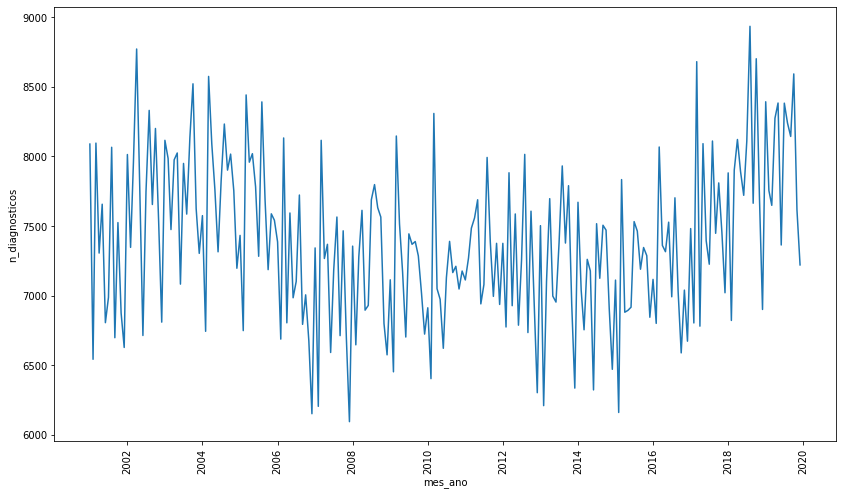

In [6]:
plt.figure(figsize=(14,8))

ax = sns.lineplot(data = serie_ano_mes, y = "n_diagnosticos", x = "mes_ano")
plt.xticks(rotation = 90)

ax;

#### Desafio 02: transformar os dados em datetime

Já foram transformados no desafio 1 :S


## Aula 02 - Manipulação de Datas

#### Desafio 03 - Faça a mesma transformação realizada em aula nas datas para a base de dados de Hanseníase.

In [7]:
path_han = "/content/drive/MyDrive/AluraBootcamp/Modulo4/hanseniasedatasus.csv"
dfhan = pd.read_csv(path_han, encoding = "ISO-8859-1", sep = ";", engine="python")

dfhan = dfhan.iloc[27:-1 , :-1].reset_index(drop=True).rename(columns={"Ano DiagnÃ³stico":"ano"})

dfhan

,ano,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,4107,4103,4787,4135,4724,3940,4116,4890,4035,4728,4197,3250
1,2002,3982,4065,4566,5027,4663,4488,4971,5281,4805,5151,4679,3545
2,2003,4127,5918,5555,4965,5013,4476,4655,4844,5249,5257,4737,3874
3,2004,4168,4169,5612,4557,5440,5299,4975,5640,4825,4233,4520,3925
4,2005,4078,4241,4998,4628,4706,4559,4154,5457,4853,5196,5008,4209
5,2006,4448,4520,5168,3865,4488,3868,3937,4868,4012,4289,4206,3399
6,2007,3999,3747,4708,3740,4161,3621,3959,4482,3810,4456,3849,3234
7,2008,3712,3642,3781,4246,3635,3938,4498,4772,4472,4059,3716,3052
8,2009,3489,3875,4584,3625,3786,3562,3813,4070,3775,3598,3750,2950
9,2010,3199,3340,4254,3548,3969,3333,3370,3947,3522,3490,3605,2928


In [8]:
# Meltar pra transformar os meses em uma variavel e aplicando um map para passa-los para int
han_mes_ano = pd.melt(dfhan, id_vars="ano", var_name="mes", value_name="frequencia")
han_mes_ano['mes'] = han_mes_ano['mes'].apply(lambda x: dict_mes[x])

# Sort e criacao da coluna dia para o dt
han_mes_ano = han_mes_ano.sort_values(by=['ano', 'mes'])
han_mes_ano['dia'] = 1

# Antes de transformar em uma série utilizando o datetime, preciso é necessario o ano/freq para int
han_mes_ano["ano"] = han_mes_ano["ano"].astype(int)
han_mes_ano["frequencia"] = han_mes_ano["frequencia"].astype(int)

han_mes_ano['mes_ano'] = pd.to_datetime(dict(year = han_mes_ano["ano"], month = han_mes_ano.mes, day = han_mes_ano.dia))

# Formatando a serie
# han_mes_ano['mes_ano'] = han_mes_ano['mes_ano'].dt.strftime('%m-%Y')
han_mes_ano = han_mes_ano[['mes_ano', 'frequencia']].reset_index(drop=True)

han_mes_ano

,mes_ano,frequencia
0,2001-01-01,4107
1,2001-02-01,4103
2,2001-03-01,4787
3,2001-04-01,4135
4,2001-05-01,4724
...,...,...
223,2019-08-01,3107
224,2019-09-01,3060
225,2019-10-01,3137
226,2019-11-01,2715


#### Desafio 04 - Configurar o gráfico de número de casos para deixá-lo mais elegante, analisar junto com um gráfico dos dados de hanseníase e compartilhar no discord suas hipóteses

In [9]:
import numpy as np
import matplotlib.dates as mdates

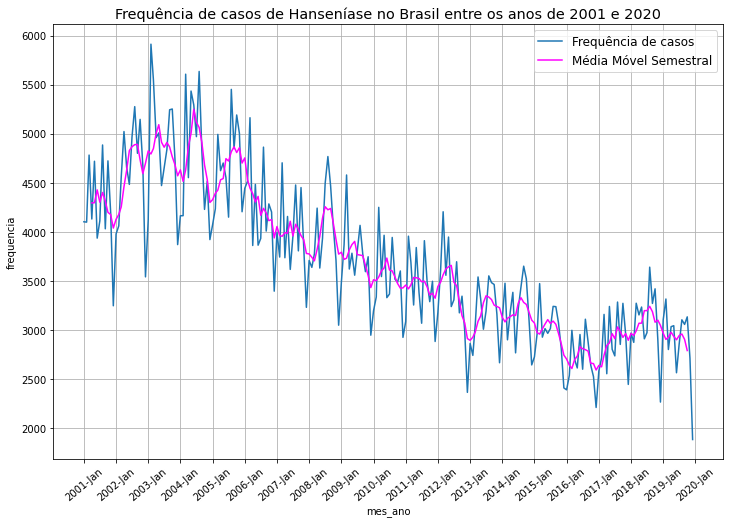

In [10]:
media_movel_6 = han_mes_ano.frequencia.rolling(window=6, center=True).mean()

fig, ax = plt.subplots(figsize = (12,8))
ax = sns.lineplot(x = 'mes_ano', y="frequencia", data = han_mes_ano, label="Frequência de casos")
plt.plot(han_mes_ano.mes_ano, media_movel_6, label="Média Móvel Semestral", color= 'Magenta')
plt.xticks(rotation = 40)

ax.xaxis.set_major_locator(mdates.YearLocator(1, month = 1, day = 1)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.legend(fontsize = 'large')
plt.grid()
plt.title("Frequência de casos de Hanseníase no Brasil entre os anos de 2001 e 2020", fontsize = 'x-large')

ax;

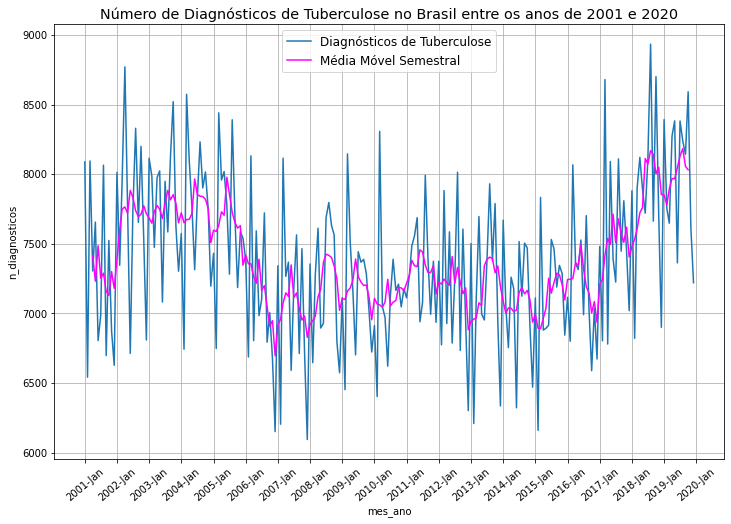

In [11]:
media_movel_6 = serie_ano_mes.n_diagnosticos.rolling(window=6, center=True).mean()

fig, ax = plt.subplots(figsize = (12,8))
ax = sns.lineplot(data = serie_ano_mes, y = "n_diagnosticos", x = serie_ano_mes.index, label="Diagnósticos de Tuberculose")
plt.plot(serie_ano_mes.index, media_movel_6, label="Média Móvel Semestral", color= 'Magenta')
plt.xticks(rotation = 40)

ax.xaxis.set_major_locator(mdates.YearLocator(1, month = 1, day = 1)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.legend(fontsize = 'large')
plt.grid()
plt.title("Número de Diagnósticos de Tuberculose no Brasil entre os anos de 2001 e 2020", fontsize = 'x-large')

ax;

In [12]:
han_media_2001_2004 = han_mes_ano[:48].frequencia.mean()
han_media_2016_2020 = han_mes_ano[-48:-1].frequencia.mean()

print(han_media_2001_2004)
print(han_media_2016_2020)


4630.583333333333
2904.404255319149


O gráfico da Hanseníase começa em alta entre os anos de 2001 e 2004, com uma média de 4630 casos mensais durante esses anos. A partir de 2005, o número de casos entra em queda até 2015, onde se estabiliza em aproximadamente 2900 casos mensais.


## Aula 03 - Iniciando a Análise de Série Temporal

Para identificar melhor o comportamento de dados com ruídos como os que estamos trabalhando, podemos utilizar a média móvel para suavizar os picos e tornar a tendência do gráfico mais visível.

Utilizamos `df.rolling()` para isso, escolhendo a janela de tempo e utilizando `center = True` nos parâmetros para um resultado centralizado

In [13]:
tuberc_ano_mes = serie_ano_mes.reset_index()
tuberc_ano_mes['media_movel_tri'] = tuberc_ano_mes.n_diagnosticos.rolling(3, center=True).mean()

Agora, plotando a curva no gráfico.

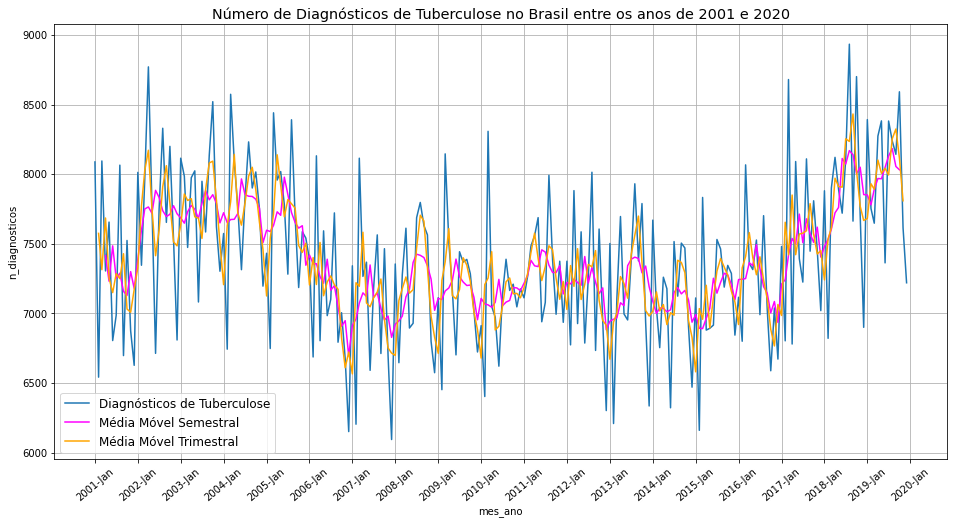

In [14]:
fig, ax = plt.subplots(figsize = (16,8))

sns.lineplot(ax=ax, data = tuberc_ano_mes, y = "n_diagnosticos", x = "mes_ano", label="Diagnósticos de Tuberculose")
plt.plot(tuberc_ano_mes.mes_ano, media_movel_6, label="Média Móvel Semestral", color = 'Magenta')
sns.lineplot(ax=ax, data = tuberc_ano_mes, y="media_movel_tri", x = "mes_ano", color = "Orange", label="Média Móvel Trimestral" )

plt.xticks(rotation = 40)

ax.xaxis.set_major_locator(mdates.YearLocator(1, month = 1, day = 1)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.legend(fontsize = 'large')
plt.grid()
plt.title("Número de Diagnósticos de Tuberculose no Brasil entre os anos de 2001 e 2020", fontsize = 'x-large')

ax;

É possível notar que quanto maior a janela da média móvel, maior a suavização do gráfico, facilitando a identificação de tendências e dificultando a visualização de alterações sazonais.

Dando um zoom no gráfico:

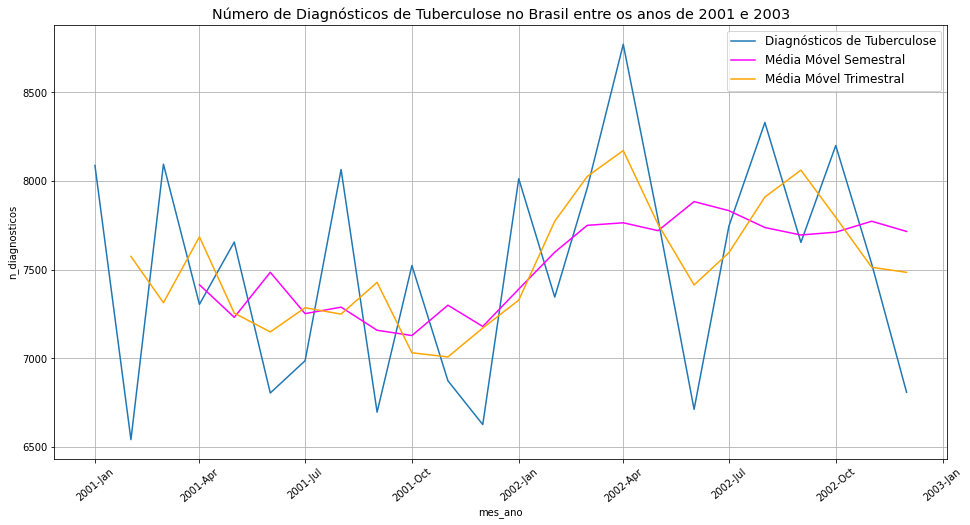

In [15]:
fig, ax = plt.subplots(figsize = (16,8))

sns.lineplot(ax=ax, data = tuberc_ano_mes[:24], y = "n_diagnosticos", x = "mes_ano", label="Diagnósticos de Tuberculose")
plt.plot(tuberc_ano_mes[:24].mes_ano, media_movel_6[:24], label="Média Móvel Semestral", color = 'Magenta')
sns.lineplot(ax=ax, data = tuberc_ano_mes[:24], y="media_movel_tri", x = "mes_ano", color = "Orange", label="Média Móvel Trimestral" )

plt.xticks(rotation = 40)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.legend(fontsize = 'large')
plt.grid()
plt.title("Número de Diagnósticos de Tuberculose no Brasil entre os anos de 2001 e 2003", fontsize = 'x-large')

ax;

#### Desafio Extra - Pesquisar o que é espectro de frequência.

#### Desafio 05 - Analisar outras janelas de médias móveis, realizar a análise dessas janelas e compartilhar suas conclusões no Discord. Refletir sobre os impactos de uma suavização com janelas muito grandes.

Utilizei a média móvel no desafio 4 com a heníase. 

Logo no gráfico acima, dá pra perceber que quanto maior a janela, maior a suavização e maior a perda de características do gráfico, como impactos sazonais.

#### Desafio 06 - Pensar em como realizar sua primeira previsão usando as médias ou qualquer outra abordagem do seu interesse.

## Aula 04 - Decomposição e Autocorrelação 

### Video 01 - Tentando encontrar padrões

#### Desafio 07: Transformas as datas em index e realizar os slices pelas datas

In [16]:
tuberc_ind_ano_mes = tuberc_ano_mes.set_index('mes_ano')

tuberc_ind_ano_mes.loc["2005-06-01":"2012-06-01"]

,n_diagnosticos,media_movel_tri
mes_ano,,
2005-06-01,7781,7694.000000
2005-07-01,7282,7818.000000
2005-08-01,8391,7787.666667
2005-09-01,7690,7755.666667
2005-10-01,7186,7487.666667
...,...,...
2012-02-01,6774,7343.666667
2012-03-01,7882,7194.333333
2012-04-01,6927,7465.000000


Para tentar observar algum tipo de sazonalidade entre os meses e os casos de tuberculose, vamos plotar os gráficos de linha separados por ano, um por cima do outro e possibilitar o comportamento mês a mês.

Inicialmente, vamos separar o mês e o ano novamente utilizando a datetime.

In [17]:
tuberc_ano_mes['mes'] = tuberc_ano_mes.mes_ano.dt.month
tuberc_ano_mes['ano'] = tuberc_ano_mes.mes_ano.dt.year

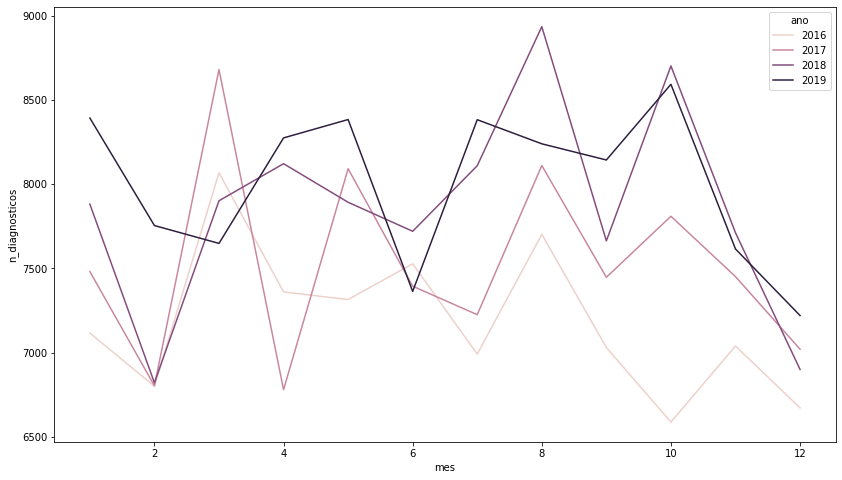

In [18]:
fig, ax = plt.subplots(figsize = (14,8))

ax = sns.lineplot(x = "mes", y='n_diagnosticos', data = tuberc_ano_mes.query("ano in [2019, 2018, 2017, 2016]"), hue="ano")

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
decomposicao_add = seasonal_decompose(tuberc_ind_ano_mes[['n_diagnosticos']])

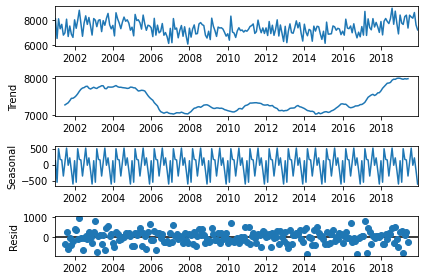

In [21]:
decomposicao_add.plot();

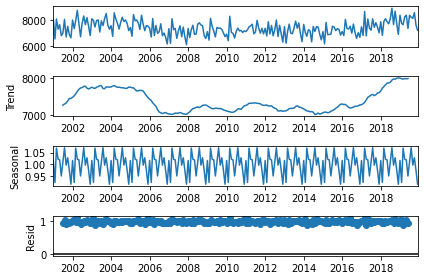

In [22]:
decomposicao_mult = seasonal_decompose(tuberc_ind_ano_mes[['n_diagnosticos']], model='multiplicative')
decomposicao_mult.plot();

Através do decompose, podemos observar a tendência dos dados de uma forma mais clara, além da sazonalidade e do ruído restante.
É possível identificar a queda nos casos a partir do ano de 2006 e o crescimento deles a partir de 2015.

### Video 02 - Decomposição de séries temporais

In [23]:
url_passageiros = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv"

df_passageiros = pd.read_csv(url_passageiros)

In [24]:
df_passageiros.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [25]:
df_passageiros['Month'] = pd.to_datetime(df_passageiros['Month'])
df_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


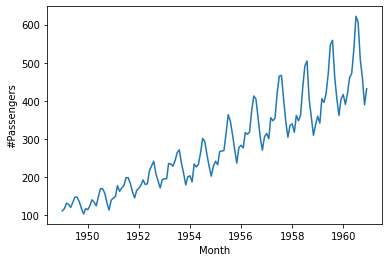

In [26]:
sns.lineplot(data = df_passageiros, x = 'Month', y = "#Passengers")
ax;

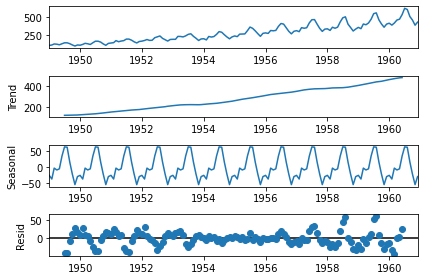

In [27]:
decompose_passageiros = seasonal_decompose(df_passageiros.set_index("Month"))
decompose_passageiros.plot()

ax;

#### Desafio 08 - Formatar os gráficos de decomposição, colocar título e modificar os tamanhos. realizar a decomposição de outras séries temporais como a da Hanseníase.

In [28]:
decompose_hanseniase = seasonal_decompose(han_mes_ano.set_index("mes_ano"))

Text(0.5, 1.0, 'Gráfico demonstrando a tendência de Hanseníase')

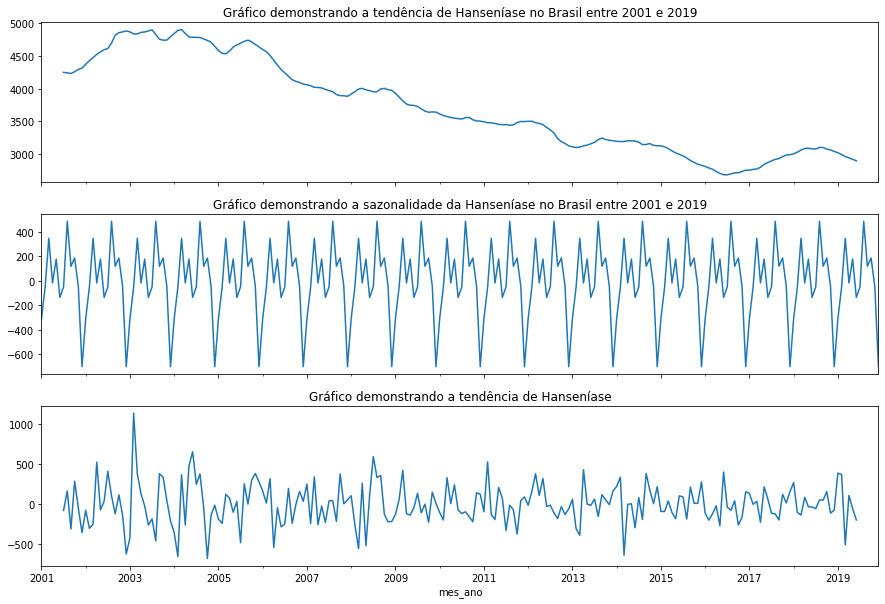

In [29]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10), sharex=True)


decompose_hanseniase.trend.plot(ax=ax1);
ax1.set_title("Gráfico demonstrando a tendência de Hanseníase no Brasil entre 2001 e 2019")


decompose_hanseniase.seasonal.plot(ax=ax2);
ax2.set_title("Gráfico demonstrando a sazonalidade da Hanseníase no Brasil entre 2001 e 2019")

decompose_hanseniase.resid.plot(ax=ax3);
ax3.set_title("Gráfico demonstrando a tendência de Hanseníase")



### Video 03  - Autoccorelação e Autocorrelação Parcial

Uma vez que para fazer correlações cruzadas são necessárias duas ou mais variáveis, para séries temporais de apenas uma váriavel utilizamos a chamada **autocorrelação**.

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

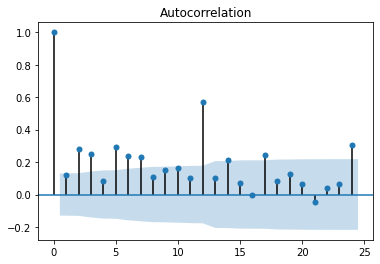

In [31]:
plot_acf(tuberc_ind_ano_mes['n_diagnosticos']);

Podemos identificar uma autocorrelação alta no lag = 12, indicando comportamento parecido entre meses iguais em anos diferentes.

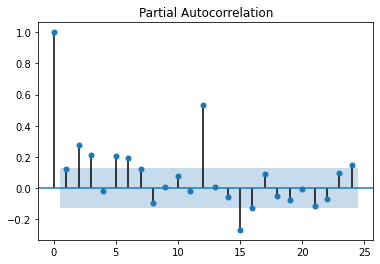

In [32]:
plot_pacf(tuberc_ind_ano_mes['n_diagnosticos']);

A autocorrelação parcial é normalizada de acordo com a autocorrelação de lag 1.

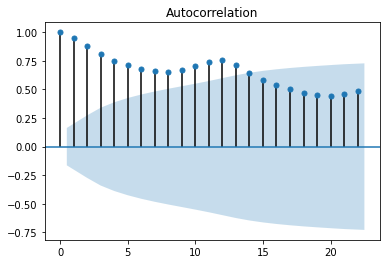

In [33]:
plot_acf(df_passageiros["#Passengers"]);

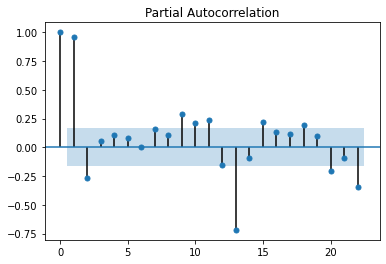

In [34]:
plot_pacf(df_passageiros["#Passengers"]);

#### Desafio 09: realizar uma análise de autocorrelação e autocorrelação parcial nos casos de Covid-19

## Aula 05 - Previsão em Séries Temporais



### Video 01 - Relembrando conceitos

Vamos rever a sazonalidade do dataset de passageiros de avião:

In [35]:
df_passageiros = df_passageiros.rename({"Month":"data", "#Passengers":"passageiros"}, axis = 1)
df_passageiros["mes"] = df_passageiros.data.dt.month
df_passageiros["ano"] = df_passageiros.data.dt.year

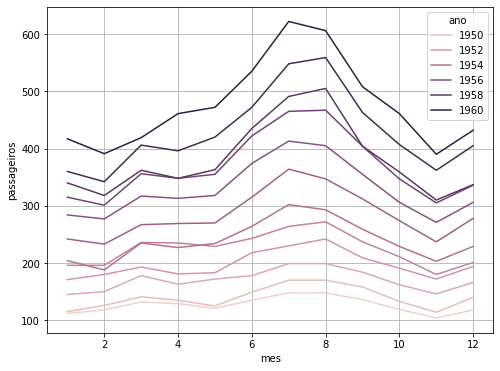

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data=df_passageiros, x='mes', y="passageiros", hue='ano', ax=ax)
plt.grid()
ax;

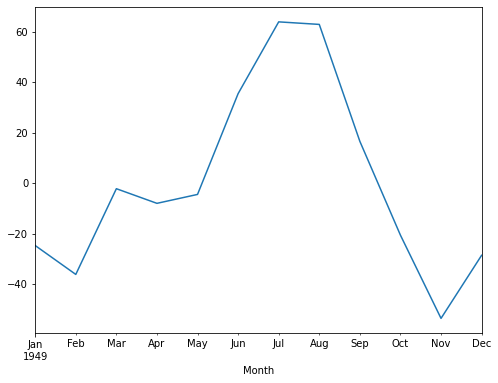

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
decompose_passageiros.seasonal[:12].plot(ax=ax);

Podemos ver um aumento de aproximadamente 20% no número de passageiros durante as épocas de verão do hemisfério Norte, local onde o dataset foi coletado. 

Aplicando o mesmo tipo de gráfico ao dataset do datasus sobre o número de casos diagnosticaods de tuberculose não retorna um gráfico tão ideal como o acima:

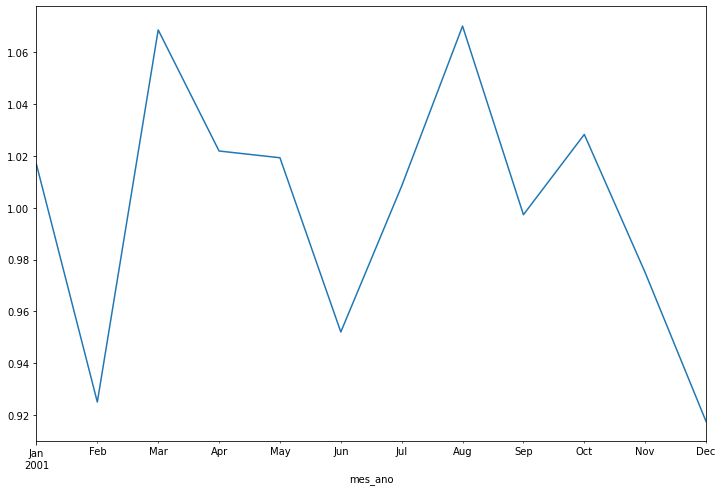

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
decomposicao_mult.seasonal[:12].plot(ax=ax);

Ainda assim, podemos observar os efeitos da sazonalidade, embora diminutos quando comparados ao dataset dos passageiros.

### Video 02 - Previsões com ARIMA

In [39]:
from statsmodels.tsa.arima_model import ARIMA

Para validar o modelo, é necessário dividi-lo em 2:

* Um set para treinamento;
* Um set para fazer a validação.

Não temos como fazer uma previsão sem antes "prever o que já sabemos", de forma a verificar o funcionamento do modelo.

In [40]:
tuberc_ano_mes

,mes_ano,n_diagnosticos,media_movel_tri,mes,ano
0,2001-01-01,8088,NaN,1,2001
1,2001-02-01,6542,7575.000000,2,2001
2,2001-03-01,8095,7314.000000,3,2001
3,2001-04-01,7305,7685.333333,4,2001
4,2001-05-01,7656,7255.333333,5,2001
...,...,...,...,...,...
223,2019-08-01,8239,8254.666667,8,2019
224,2019-09-01,8143,8324.666667,9,2019
225,2019-10-01,8592,8116.666667,10,2019
226,2019-11-01,7615,7809.000000,11,2019


In [41]:
df_treino = tuberc_ano_mes.query("ano != 2019")
df_validation = tuberc_ano_mes.query("ano == 2019")

modelo_arima = ARIMA(df_treino["n_diagnosticos"].values.astype("float64"), order=[0,0,0])
modelo_arima_treinado = modelo_arima.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [42]:
previsao = modelo_arima_treinado.forecast(12)[0]
df_validation["previsao"] = previsao

modelo_arima_treinado.forecast(12)[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([7355.33333559, 7355.33333559, 7355.33333559, 7355.33333559,
       7355.33333559, 7355.33333559, 7355.33333559, 7355.33333559,
       7355.33333559, 7355.33333559, 7355.33333559, 7355.33333559])

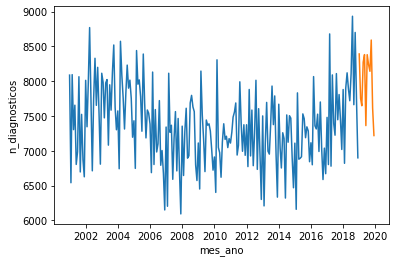

In [43]:
sns.lineplot(x="mes_ano", y="n_diagnosticos", data=df_treino)
sns.lineplot(x="mes_ano", y="n_diagnosticos", data=df_validation)
ax;

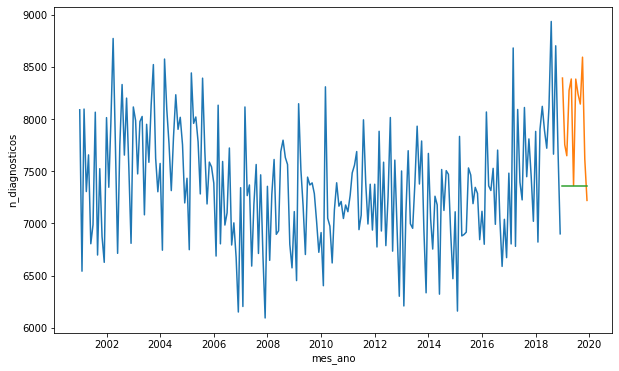

In [44]:
plt.figure(figsize=(10,6))

sns.lineplot(x="mes_ano", y="n_diagnosticos", data=df_treino)
sns.lineplot(x="mes_ano", y="n_diagnosticos", data=df_validation)
sns.lineplot(x="mes_ano", y="previsao", data=df_validation)

ax;

#### Desafio 10 - Na tupla de retorno do forecast, estudar o que são os elementos 1 e 2 da tupla.

In [45]:
modelo_arima_treinado.forecast(12)[1:]

(array([554.13959834, 554.13959834, 554.13959834, 554.13959834,
        554.13959834, 554.13959834, 554.13959834, 554.13959834,
        554.13959834, 554.13959834, 554.13959834, 554.13959834]),
 array([[6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073],
        [6269.23968044, 8441.42699073]]))

O segundo elemento da tupla é uma array com o desvio padrão das previsões. O terceiro elemento é uma array 2D, contendo o intervalo de confiança da previsão.


#### Desafio 11: Utilizar o ARIMA para a base de dados de passageiros e modificar os parâmetros "order"

In [46]:
df_passageiros

,data,passageiros,mes,ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949
...,...,...,...,...
139,1960-08-01,606,8,1960
140,1960-09-01,508,9,1960
141,1960-10-01,461,10,1960
142,1960-11-01,390,11,1960


Como o data set dos passageiros vai até 1960, irei utilizar esse ano como forma de validação.

In [47]:
df_pass_treino = df_passageiros.query("ano != 1960")
df_pass_validation = df_passageiros.query("ano == 1960")

modelo_arima = ARIMA(df_pass_treino["passageiros"].values.astype("float64"), order=[0,0,0])
modelo_arima_treinado = modelo_arima.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [48]:
previsao = modelo_arima_treinado.forecast(12)[0]
df_pass_validation["previsao"] = previsao

modelo_arima_treinado.forecast(12)[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([262.49242424, 262.49242424, 262.49242424, 262.49242424,
       262.49242424, 262.49242424, 262.49242424, 262.49242424,
       262.49242424, 262.49242424, 262.49242424, 262.49242424])

In [49]:
def treinar_arima_passageiros(order = [0,0,0]):
  modelo_arima = ARIMA(df_pass_treino["passageiros"].values.astype("float64"), order=order)
  modelo_arima_treinado = modelo_arima.fit()
  previsao = modelo_arima_treinado.forecast(12)[0]
  df_pass_validation["previsao"] = previsao


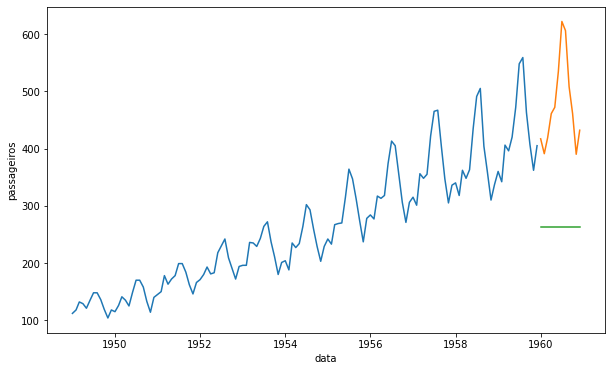

In [50]:
def plot_passageiros():
  plt.figure(figsize=(10,6))

  sns.lineplot(x="data", y="passageiros", data=df_pass_treino)
  sns.lineplot(x="data", y="passageiros", data=df_pass_validation)
  sns.lineplot(x="data", y="previsao", data=df_pass_validation)

  ax;

plot_passageiros()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  Conv

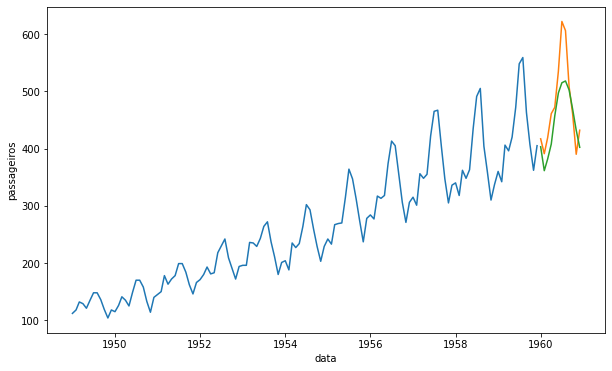

In [51]:
treinar_arima_passageiros([4,1,6])
plot_passageiros();

Utilizando p = 4, d = 1 e q = 6 obtive o resultado mais parecido com o esperado. 

### Video 03 - Ajuste dos Parâmetros

Para escolher os valores dos parâmetros p, d e q manualmente, empregaremos essa tabela disponibilizada no site do MatLab:

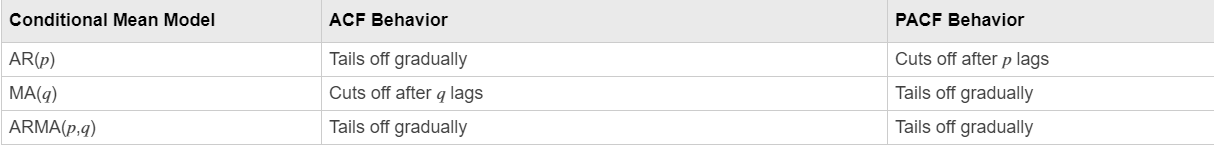

Para o data set de tuberculose, obtivemos esses resultados na autocorrelação e na autocorrelaçao parcial:
<br>
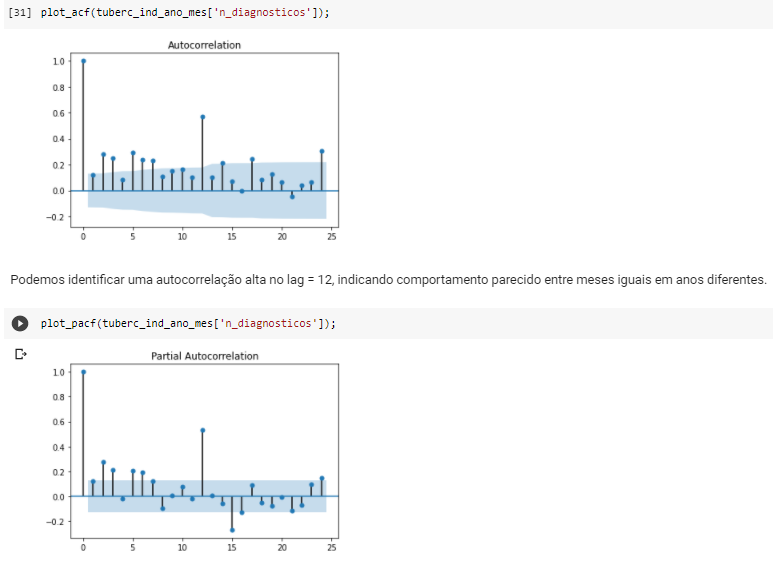

In [52]:
modelo_arima = ARIMA(df_treino["n_diagnosticos"].values.astype("float64"), order=[12,1,2])
modelo_arima_treinado = modelo_arima.fit()

previsao = modelo_arima_treinado.forecast(12)[0]
df_validation["previsao"] = previsao

modelo_arima_treinado.forecast(12)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

array([8216.6424095 , 7149.9942677 , 7970.01965973, 8163.98839685,
       7785.68661948, 7891.92112849, 7928.50841687, 8471.04779394,
       7865.80145295, 8383.95028473, 7831.00507078, 7269.16645958])

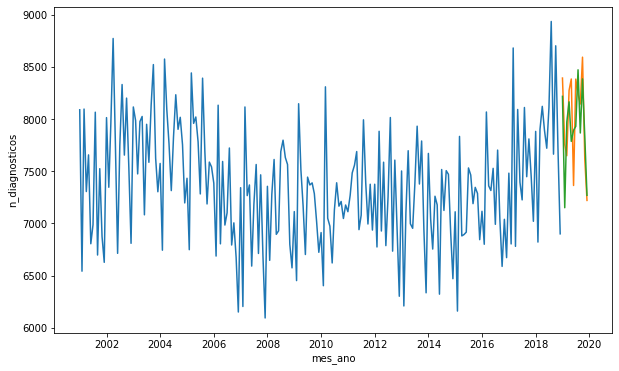

In [53]:
plt.figure(figsize=(10,6))

sns.lineplot(x="mes_ano", y="n_diagnosticos", data=df_treino)
sns.lineplot(x="mes_ano", y="n_diagnosticos", data=df_validation)
sns.lineplot(x="mes_ano", y="previsao", data=df_validation)

ax;

#### Desafio 12 - Calcula uma série temporal diferenciada de 1 e 2 ordem e plotar os gráficos destas séries para verificar o efeito do parâmetro de diferenciação do ARIMA.

In [54]:
df_passageiros['diff'] = df_passageiros['passageiros'].diff(2)

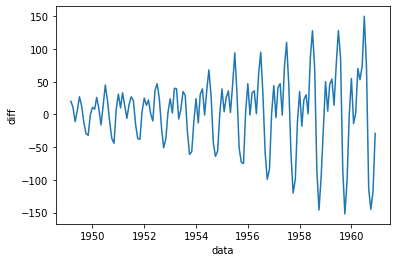

In [55]:
sns.lineplot(data = df_passageiros, x = 'data', y = 'diff')

In [56]:
df_passageiros['diff'] = df_passageiros['passageiros'].diff()

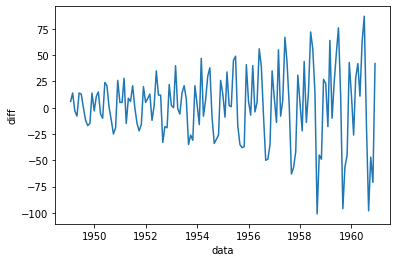

In [57]:
sns.lineplot(data = df_passageiros, x = 'data', y = 'diff')

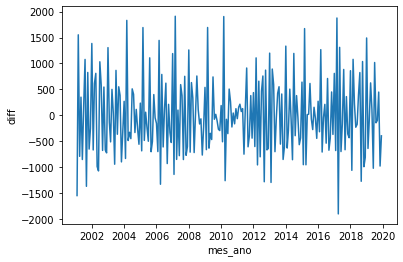

In [58]:
tuberc_ano_mes['diff'] = tuberc_ano_mes['n_diagnosticos'].diff()
sns.lineplot(data = tuberc_ano_mes, x = 'mes_ano', y = 'diff')

## Aula 6 - AUTOARIMA e Prophet

### Video 1 - Métricas de Avaliação e AUTOARIMA

Para a utilização do autoarima, script baseado em R, precisamos instalar a biblioteca utilizando o pip e importar a função.

In [60]:
from pmdarima.arima import auto_arima

Commo nossos dados sofrem efeitos de sazonalidade mensal, o parâmetro `m = 12` foi adicionado ao código. Além dele, optamos por ignorar os erros caso eles aparacessem e utilizamos o `trace = True` para poder acompanhar o que o script está fazendo.

In [61]:
modelo_auto_arima = auto_arima(df_treino["n_diagnosticos"].values, error_action = 'ignore', trace=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.19 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=1.90 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.21 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=1.13 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=2.38 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=0.92 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.80 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3

In [62]:
previsao_auto_arima = modelo_auto_arima.predict(12)
df_validation['previsao_auto_arima'] = previsao_auto_arima

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Com o modelo treinado, podemos verificar os resultados plotando:

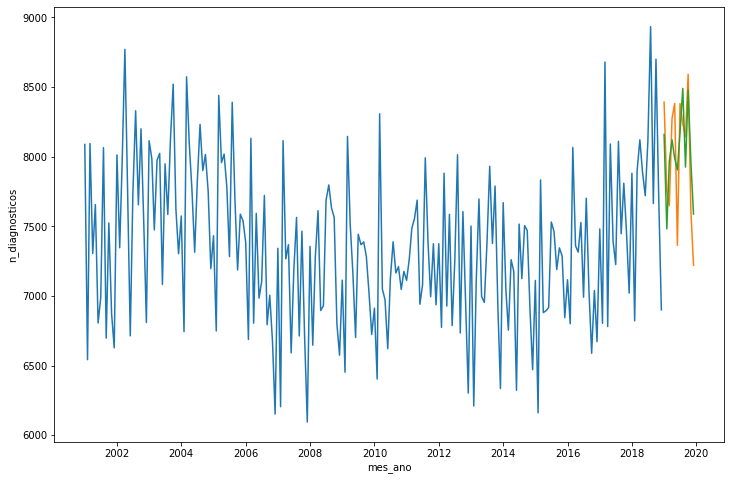

In [63]:
plt.figure(figsize=(12,8))

sns.lineplot(data=df_treino, x="mes_ano", y="n_diagnosticos")
sns.lineplot(data=df_validation, x="mes_ano", y="n_diagnosticos")
sns.lineplot(data=df_validation, x="mes_ano", y="previsao_auto_arima")

Além disso, podemos comparar o modelo autosarima com o que parametrizamos manualmente:

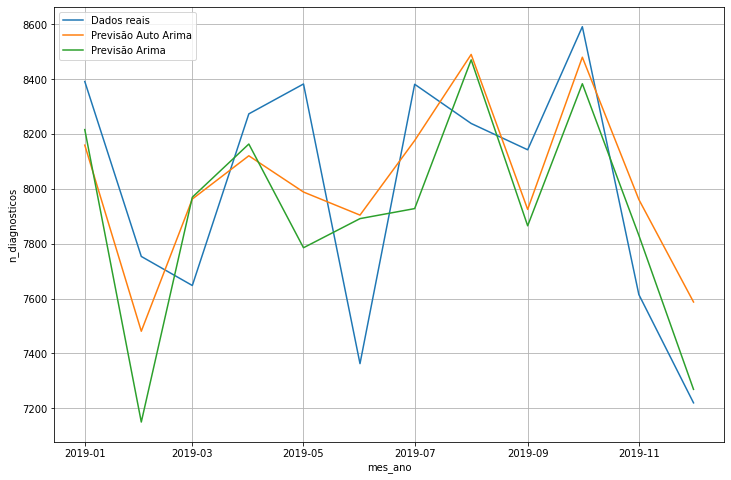

In [64]:
plt.figure(figsize=(12,8))
plt.grid()

sns.lineplot(data=df_validation, x="mes_ano", y="n_diagnosticos", label = "Dados reais")
sns.lineplot(data=df_validation, x="mes_ano", y="previsao_auto_arima", label = "Previsão Auto Arima")
sns.lineplot(data=df_validation, x="mes_ano", y="previsao", label = "Previsão Arima")

ax;

Como os resultados são parecidos, utilizaremos a biblioteca skicit-learn, especificamente a lib que envolve métricas de avaliação, para examinar qual obteve o resultado mais próximo do real.

In [65]:
from sklearn.metrics import mean_absolute_error

In [66]:
score_auto_arima = mean_absolute_error(df_validation['n_diagnosticos'], df_validation['previsao_auto_arima'])
score_arima = mean_absolute_error(df_validation['n_diagnosticos'], df_validation['previsao'])

print(f"Score Auto Arima: {score_auto_arima}\nScore Arima: {score_arima}")

Score Auto Arima: 284.0994734107751
Score Arima: 314.4656887045125


#### Desafio 13 -Variar os parâmetros max_p(d,q) para verificar os efeitos no resultados.

####  Desafio 14 - Testar vários parâmetros para os dados de passageiros

In [67]:
df_pass_treino

,data,passageiros,mes,ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949
...,...,...,...,...
127,1959-08-01,559,8,1959
128,1959-09-01,463,9,1959
129,1959-10-01,407,10,1959
130,1959-11-01,362,11,1959


In [68]:
modelo_auto_arima_pass = auto_arima(df_pass_treino["passageiros"].values, error_action = 'ignore', trace=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.45 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.43 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.29 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.43 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.62 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.31 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.61 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.16 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.44 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [69]:
previsao_pass_auto_arima = modelo_auto_arima_pass.predict(12)
df_pass_validation['previsao_auto_arima'] = previsao_pass_auto_arima

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


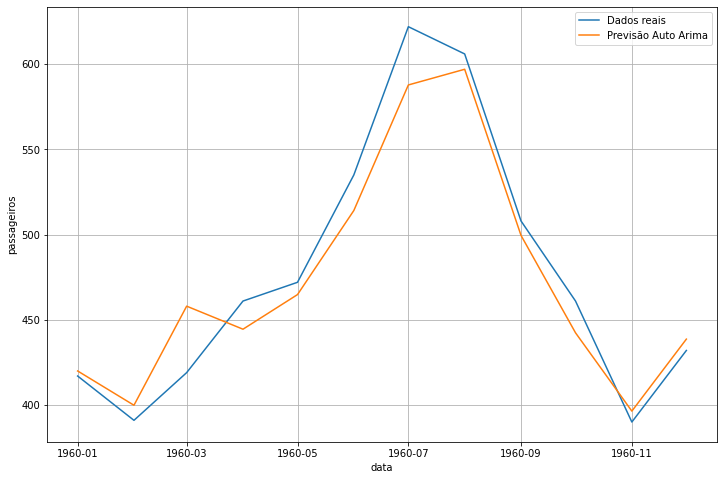

In [70]:
plt.figure(figsize=(12,8))
plt.grid()

sns.lineplot(data=df_pass_validation, x="data", y="passageiros", label = "Dados reais")
sns.lineplot(data=df_pass_validation, x="data", y="previsao_auto_arima", label = "Previsão Auto Arima")


ax;

### Video 2 - Previsões com Prophet

O Prophet é uma biblioteca para previsões de séries temporais desenvolvida pelo time de ciência de dados do Facebook.
<br>

Documentação: https://facebook.github.io/prophet/docs/quick_start.html


In [71]:
from fbprophet import Prophet

O Prophet necessita que nossas colunas tenham nomes especificos:
* A coluna que possui as datas será chamada "ds"
* A coluna com os valores precisa ser chamada "y"

In [72]:
df_pass_treino_prophet = df_pass_treino[["data", "passageiros"]].rename(columns={"data":"ds", "passageiros":"y"})

In [73]:
modelo_profeta = Prophet()
modelo_profeta_treinado = modelo_profeta.fit(df_pass_treino_prophet[["ds", "y"]])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
futuro = modelo_profeta_treinado.make_future_dataframe(periods = 12, freq="M")
resultado_prophet = modelo_profeta_treinado.predict(futuro)

In [75]:
resultado_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,108.446107,56.721983,108.150103,108.446107,108.446107,-24.724897,-24.724897,-24.724897,-24.724897,-24.724897,-24.724897,0.0,0.0,0.0,83.721210
1,1949-02-01,110.624181,49.497877,101.856261,110.624181,110.624181,-34.382555,-34.382555,-34.382555,-34.382555,-34.382555,-34.382555,0.0,0.0,0.0,76.241626
2,1949-03-01,112.591474,90.430123,141.567560,112.591474,112.591474,3.105411,3.105411,3.105411,3.105411,3.105411,3.105411,0.0,0.0,0.0,115.696885
3,1949-04-01,114.769548,83.650027,135.373407,114.769548,114.769548,-5.768648,-5.768648,-5.768648,-5.768648,-5.768648,-5.768648,0.0,0.0,0.0,109.000900
4,1949-05-01,116.877362,84.050956,134.968087,116.877362,116.877362,-5.379491,-5.379491,-5.379491,-5.379491,-5.379491,-5.379491,0.0,0.0,0.0,111.497871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-07-31,467.254909,508.058213,557.654699,466.957631,467.532801,66.342561,66.342561,66.342561,66.342561,66.342561,66.342561,0.0,0.0,0.0,533.597470
140,1960-08-31,470.249335,456.592740,508.715058,469.890600,470.577552,12.617259,12.617259,12.617259,12.617259,12.617259,12.617259,0.0,0.0,0.0,482.866594
141,1960-09-30,473.147167,418.713185,472.641448,472.709781,473.534004,-27.160103,-27.160103,-27.160103,-27.160103,-27.160103,-27.160103,0.0,0.0,0.0,445.987064
142,1960-10-31,476.141594,389.872835,441.892515,475.628562,476.600800,-61.655518,-61.655518,-61.655518,-61.655518,-61.655518,-61.655518,0.0,0.0,0.0,414.486076


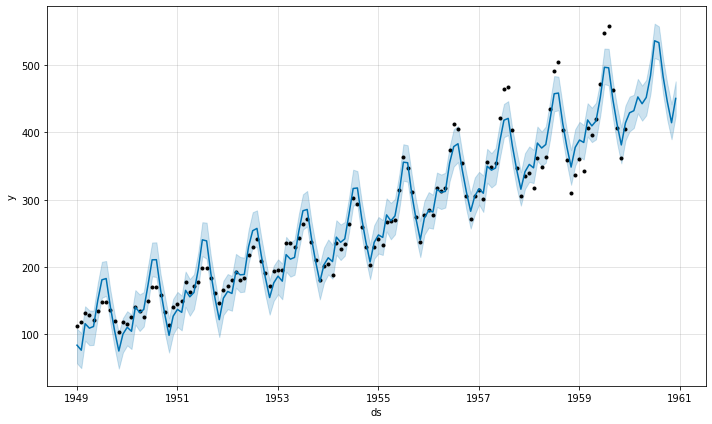

In [76]:
modelo_profeta_treinado.plot(resultado_prophet)
ax;

O modelo conseguiu seguir a tendência dos dados, mas não conseguiu acompanhar os valores nos anos iniciais (preveu valores maiores) e finais (preveu valores menores).

Para tentar resolver isso, instanciaremos o prophet em modo multiplicativo:

In [77]:
modelo_profeta = Prophet(seasonality_mode="multiplicative")
modelo_profeta_treinado = modelo_profeta.fit(df_pass_treino_prophet[["ds", "y"]])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
futuro = modelo_profeta_treinado.make_future_dataframe(periods = 12, freq="M")
resultado_prophet = modelo_profeta_treinado.predict(futuro)

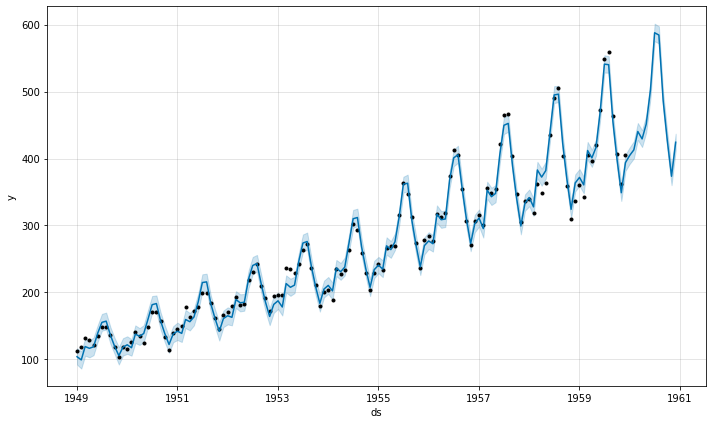

In [79]:
modelo_profeta_treinado.plot(resultado_prophet)
ax;

#### Desafio 15 - Plotar os valores reais e valores previstos pelo ¨profeta¨. Fazer a mesma análise para os dados de tuberculose e compartilhar os resultado.

Inicialmente, vamos plotar e comparar os resultados do Prophet e do Auto-Arima, unindo-os com os valores reais:

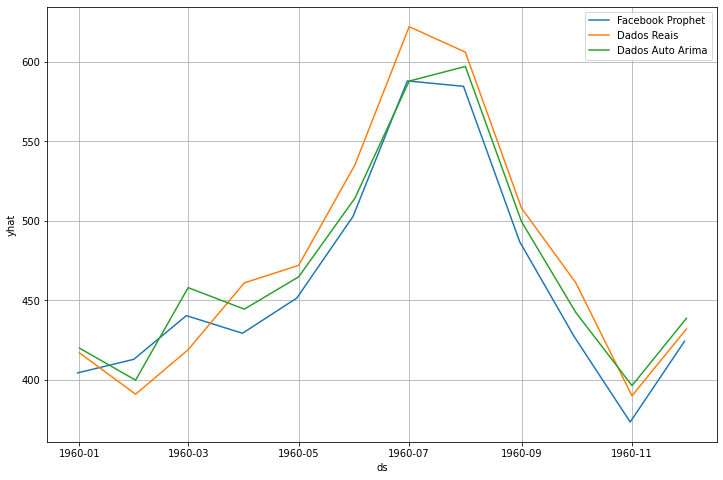

In [80]:
plt.figure(figsize=(12,8))
plt.grid()

sns.lineplot(data=resultado_prophet[-12:], x='ds', y='yhat', label = 'Facebook Prophet')
sns.lineplot(data=df_pass_validation, x='data', y='passageiros', label = 'Dados Reais')
sns.lineplot(data=df_pass_validation, x='data', y='previsao_auto_arima', label = 'Dados Auto Arima')

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
prophet_score = mean_squared_error(df_pass_validation["passageiros"], resultado_prophet[-12:]["yhat"])
auto_arima_pass_score = mean_squared_error(df_pass_validation["passageiros"], df_pass_validation["previsao_auto_arima"])

print(f"AutoArima Score: {auto_arima_pass_score}\nProphet Score: {prophet_score}")

AutoArima Score: 343.6006816829735
Prophet Score: 591.0863344697116


Nesse teste de erro médio absoluto quanto menor o valor, melhor o desempenho. Logo, o auto_arima desempenhou melhor.

##### Prophet x Dados de Tuberculose

In [83]:
df_tuberc_treino_prophet = df_treino[["mes_ano", "n_diagnosticos"]].rename(columns={"mes_ano":"ds", "n_diagnosticos":"y"})

In [84]:
modelo_profeta_tuberc = Prophet(seasonality_mode="multiplicative")
modelo_profeta_tuberc_treinado = modelo_profeta_tuberc.fit(df_tuberc_treino_prophet[["ds", "y"]])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
futuro_tuberc = modelo_profeta_tuberc_treinado.make_future_dataframe(periods = 12, freq="M")
resultado_prophet_tuberc = modelo_profeta_tuberc_treinado.predict(futuro_tuberc)

In [86]:
resultado_prophet_tuberc

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2001-01-01,7677.431620,7366.939690,8295.916717,7677.431620,7677.431620,0.021426,0.021426,0.021426,0.021426,0.021426,0.021426,0.0,0.0,0.0,7841.925017
1,2001-02-01,7674.773971,6453.742926,7374.017128,7674.773971,7674.773971,-0.099979,-0.099979,-0.099979,-0.099979,-0.099979,-0.099979,0.0,0.0,0.0,6907.458238
2,2001-03-01,7672.373514,7783.642916,8689.294249,7672.373514,7672.373514,0.075545,0.075545,0.075545,0.075545,0.075545,0.075545,0.0,0.0,0.0,8251.985125
3,2001-04-01,7669.715865,7311.723057,8219.863837,7669.715865,7669.715865,0.014073,0.014073,0.014073,0.014073,0.014073,0.014073,0.0,0.0,0.0,7777.648893
4,2001-05-01,7667.143946,7314.611681,8192.991439,7667.143946,7667.143946,0.012142,0.012142,0.012142,0.012142,0.012142,0.012142,0.0,0.0,0.0,7760.241704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2019-07-31,7843.214052,7492.831394,8443.592339,7838.416792,7848.672314,0.018249,0.018249,0.018249,0.018249,0.018249,0.018249,0.0,0.0,0.0,7986.347122
224,2019-08-31,7855.461529,7421.076185,8323.870606,7849.177440,7862.008200,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.0,0.0,0.0,7859.591875
225,2019-09-30,7867.313926,7829.173035,8767.014979,7859.664120,7875.058961,0.055514,0.055514,0.055514,0.055514,0.055514,0.055514,0.0,0.0,0.0,8304.062207
226,2019-10-31,7879.561403,7178.180927,8107.992214,7870.518052,7888.788528,-0.027867,-0.027867,-0.027867,-0.027867,-0.027867,-0.027867,0.0,0.0,0.0,7659.985529


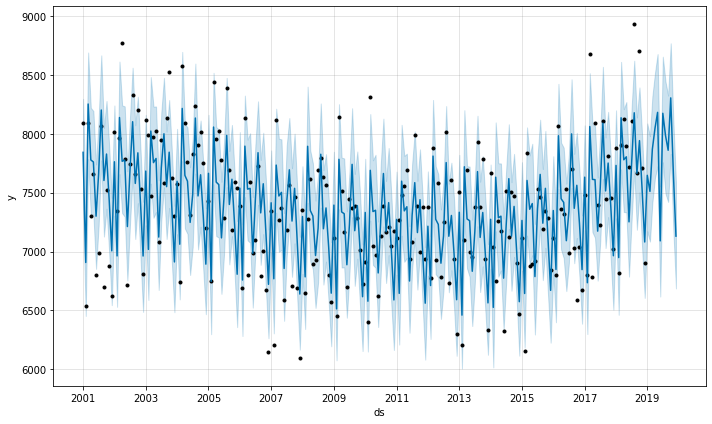

In [87]:
modelo_profeta_tuberc_treinado.plot(resultado_prophet_tuberc)
ax;

In [88]:
df_validation

,mes_ano,n_diagnosticos,media_movel_tri,mes,ano,previsao,previsao_auto_arima
216,2019-01-01,8392,7682.000000,1,2019,8216.642409,8159.981127
217,2019-02-01,7754,7931.333333,2,2019,7149.994268,7481.164372
218,2019-03-01,7648,7892.000000,3,2019,7970.019660,7963.335593
219,2019-04-01,8274,8101.666667,4,2019,8163.988397,8121.140600
220,2019-05-01,8383,8006.666667,5,2019,7785.686619,7988.910511
221,2019-06-01,7363,8042.666667,6,2019,7891.921128,7904.763815
222,2019-07-01,8382,7994.666667,7,2019,7928.508417,8176.777047
223,2019-08-01,8239,8254.666667,8,2019,8471.047794,8490.763055
224,2019-09-01,8143,8324.666667,9,2019,7865.801453,7925.540992
225,2019-10-01,8592,8116.666667,10,2019,8383.950285,8480.637679


Vamos plotar e comparar os resultados do Prophet e do Auto-Arima, unindo-os com os valores reais:

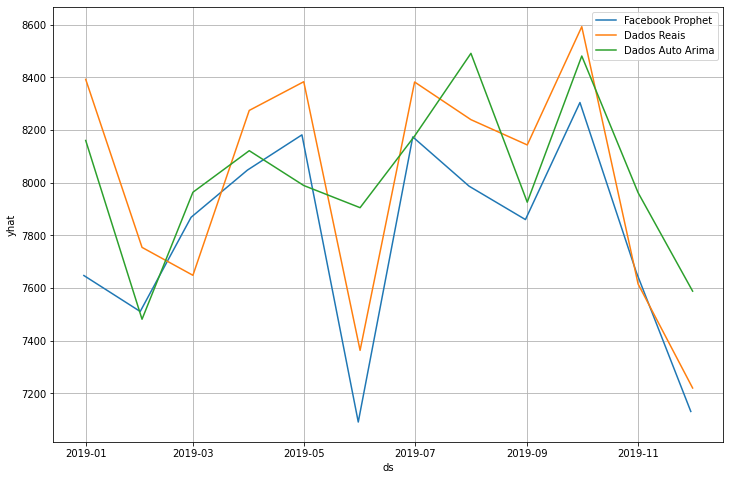

In [89]:
plt.figure(figsize=(12,8))
plt.grid()

sns.lineplot(data=resultado_prophet_tuberc[-12:], x='ds', y='yhat', label = 'Facebook Prophet')
sns.lineplot(data=df_validation, x='mes_ano', y='n_diagnosticos', label = 'Dados Reais')
sns.lineplot(data=df_validation, x='mes_ano', y='previsao_auto_arima', label = 'Dados Auto Arima')

In [90]:
prophet_tubec_score = mean_absolute_error(df_validation["n_diagnosticos"], resultado_prophet_tuberc[-12:]["yhat"])
autoarima_tubec_score = mean_absolute_error(df_validation["n_diagnosticos"], df_validation["previsao_auto_arima"])

print(f"AutoArima Score: {autoarima_tubec_score}\nProphet Score: {prophet_tubec_score}")

AutoArima Score: 284.0994734107751
Prophet Score: 256.2997656938904
